In [1]:
# importing libraries

import os
import numpy as np
import sounddevice as sd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import pandas as pd
import librosa
import matplotlib.pyplot as plt

In [3]:
# defining data
RAVDESS = "C:/Users/abdal/Desktop/Smart Final Project/Ravdess"
CREMA = "C:/Users/abdal/Desktop/Smart Final Project/Crema"
TESS = "C:/Users/abdal/Desktop/Smart Final Project/Tess"
SAVEE = "C:/Users/abdal/Desktop/Smart Final Project/Savee"

ravdess_dir_lis = os.listdir(RAVDESS)
path_list = []
gender_list = []
emotion_list = []

emotion_dic = {
    '03' : 'happy',
    '01' : 'neutral',
    '04' : 'sad',
    '05' : 'angry',
    '06' : 'fear',
    '07' : 'disgust',
}



In [5]:
# Helper function to process one audio file
def process_audio_file(full_path, filename):
    part = filename.split('.')[0]
    splits = part.split('-')
    
    if len(splits) != 7:
        return  # Invalid filename format
    
    emotion_code = splits[2]
    actor_id = int(splits[6])

    if emotion_code in emotion_dic:
        gender = 'female' if actor_id % 2 == 0 else 'male'
        emotion = emotion_dic[emotion_code]
        path_list.append(full_path)
        gender_list.append(gender)
        emotion_list.append(emotion)


In [7]:
# Walk through files (handles both with/without subfolders)
for root, dirs, files in os.walk(RAVDESS):
    for file in files:
        if file.endswith(".wav"):
            full_path = os.path.join(root, file)
            process_audio_file(full_path, file)


In [9]:
# Create dataframe
ravdess_df = pd.DataFrame({
    'path': path_list,
    'sex': gender_list,
    'emotion': emotion_list
})


In [11]:
#Crema DataSet
crema_dir_list = os.listdir(CREMA)
path_list = []
gender_list = []
emotion_list = []

emotion_dic = {
    'HAP' : 'happy',
    'NEU' : 'neutral',
    'SAD' : 'sad',
    'ANG' : 'angry',
    'FEA' : 'fear',
    'DIS' : 'disgust',
}

female_id_list = [
    '1002', '1003', '1004', '1006', '1007', '1008', '1009', '1010', '1012', '1013', '1018', 
    '1020', '1021', '1024', '1025', '1028', '1029', '1030', '1037', '1043', '1046', '1047', 
    '1049', '1052', '1053', '1054', '1055', '1056', '1058', '1060', '1061', '1063', '1072', 
    '1073', '1074', '1075', '1076', '1078', '1079', '1082', '1084', '1089', '1091',
]

for audio_file in crema_dir_list:
    part = audio_file.split('_')
    key = part[2]
    if key in emotion_dic and part[3] == 'HI.wav':
        path_list.append(f"{CREMA}{audio_file}")
        gender_list.append('female' if part[0] in female_id_list else 'male')
        emotion_list.append(emotion_dic[key])

crema_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

tess_dir_list = os.listdir(TESS)
path_list = []
gender_list = []
emotion_list = [] 

emotion_dic = {
    'happy'   : 'happy',
    'neutral' : 'neutral',
    'sad'     : 'sad',
    'Sad'     : 'sad',
    'angry'   : 'angry',
    'fear'    : 'fear',
    'disgust'  : 'disgust',
}

for directory in tess_dir_list:
    audio_files = os.listdir(os.path.join(TESS, directory))
    for audio_file in audio_files:
        part = audio_file.split('.')[0]
        key = part.split('_')[2]
        if key in emotion_dic:
            path_list.append(f"{TESS}{directory}/{audio_file}") 
            gender_list.append('female') # female only dataset
            emotion_list.append(emotion_dic[key])
            
tess_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)


savee_dir_list = os.listdir(SAVEE)
path_list = []
gender_list = []
emotion_list = []

emotion_dic = {
    'h'  : 'happy',
    'n'  : 'neutral',
    'sa' : 'sad',
    'a'  : 'angry',
    'f'  : 'fear',
    'd'  : 'disgust'
}

for audio_file in savee_dir_list:
    part = audio_file.split('_')[1]
    key = part[:-6]
    if key in emotion_dic:
        path_list.append(f"{SAVEE}{audio_file}")
        gender_list.append('male') # male only dataset
        emotion_list.append(emotion_dic[key])
        
savee_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)



In [13]:
#now we have the all data in the model so we need to make the mix
df = pd.concat([ravdess_df, crema_df, tess_df, savee_df], axis=0)

plt.style.use('ggplot')
def plot_distribution(df): 
    countTable = df.groupby(['emotion', 'sex']).count()
    pivotTable = countTable.pivot_table(index='emotion', columns='sex', values='path')

    pivotTable.plot(kind='bar', figsize=(6, 3), color=['pink', 'blue'])
    plt.title('Emotion and Gender Distribution')
    plt.xlabel('Emotion')
    plt.ylabel('Count')
    plt.show()
    

C:\Users\abdal\anaconda3\Lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)
C:\Users\abdal\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
C:\Users\abdal\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
C:\Users\abdal\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this mod

Failed for path: C:/Users/abdal/Desktop/Smart Final Project/Ravdess\audio_speech_actors_01-24\Actor_20\03-01-06-01-01-02-20.wav


C:\Users\abdal\AppData\Local\Temp\ipykernel_2244\1942045596.py:6: UserWarning: PySoundFile failed. Trying audioread instead.
  _, sr = librosa.load(path)
C:\Users\abdal\anaconda3\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Failed for path: C:/Users/abdal/Desktop/Smart Final Project/Crema1001_IEO_ANG_HI.wav
Failed for path: C:/Users/abdal/Desktop/Smart Final Project/Crema1001_IEO_DIS_HI.wav
Failed for path: C:/Users/abdal/Desktop/Smart Final Project/Crema1001_IEO_FEA_HI.wav
Failed for path: C:/Users/abdal/Desktop/Smart Final Project/Crema1001_IEO_HAP_HI.wav
Failed for path: C:/Users/abdal/Desktop/Smart Final Project/Crema1001_IEO_SAD_HI.wav
Failed for path: C:/Users/abdal/Desktop/Smart Final Project/Crema1002_IEO_ANG_HI.wav
Failed for path: C:/Users/abdal/Desktop/Smart Final Project/Crema1002_IEO_DIS_HI.wav
Failed for path: C:/Users/abdal/Desktop/Smart Final Project/Crema1002_IEO_FEA_HI.wav
Failed for path: C:/Users/abdal/Desktop/Smart Final Project/Crema1002_IEO_HAP_HI.wav
Failed for path: C:/Users/abdal/Desktop/Smart Final Project/Crema1002_IEO_SAD_HI.wav
Failed for path: C:/Users/abdal/Desktop/Smart Final Project/Crema1003_IEO_ANG_HI.wav
Failed for path: C:/Users/abdal/Desktop/Smart Final Project/Crema

C:\Users\abdal\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 352, 64)        │        20,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,894 (210.52 KB)

 Trainable params: 53,894 (210.52 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 48s 278ms/step - categorical_accuracy: 0.2321 - loss: 1.7171 - val_categorical_accuracy: 0.2955 - val_loss: 1.5372
Epoch 2/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 68s 188ms/step - categorical_accuracy: 0.3444 - loss: 1.5255 - val_categorical_accuracy: 0.3636 - val_loss: 1.4716
Epoch 3/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 17s 108ms/step - categorical_accuracy: 0.3590 - loss: 1.5529 - val_categorical_accuracy: 0.3523 - val_loss: 1.5097
Epoch 4/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 39s 254ms/step - categorical_accuracy: 0.3545 - loss: 1.5427 - val_categorical_accuracy: 0.3182 - val_loss: 1.5384
Epoch 5/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 46s 285ms/step - categorical_accuracy: 0.3359 - loss: 1.5080 - val_categorical_accuracy: 0.3295 - val_loss: 1.5087
Epoch 6/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 78s 258ms/step - categorical_accuracy: 0.3967 - loss: 1.4519 - val_categorical_accuracy: 0.2727 - val_loss: 1.5503
Epoch 7/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 16s 95ms/step - categoric

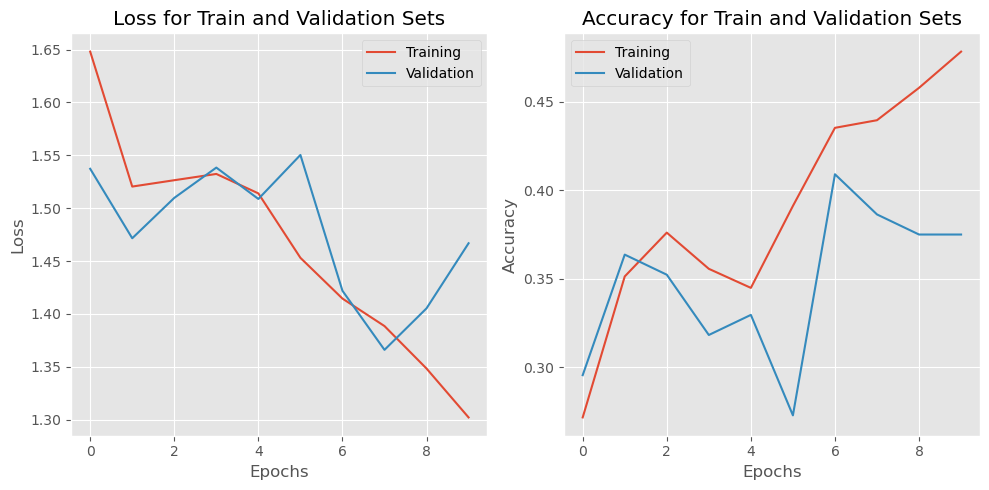

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 462ms/step


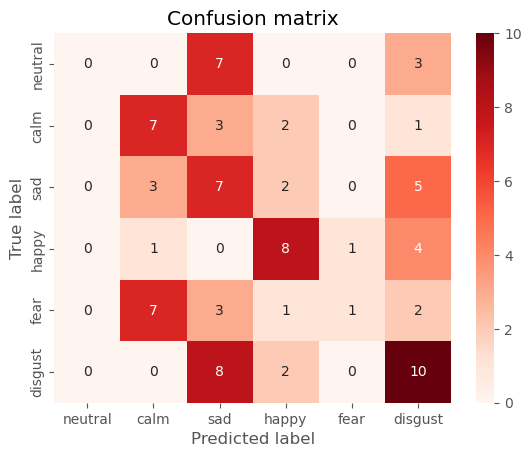

In [15]:
#plot_distribution(df)


from pydub import AudioSegment, effects
def preprocess_audio(path):
    _, sr = librosa.load(path)
    raw_audio = AudioSegment.from_file(path)
    
    samples = np.array(raw_audio.get_array_of_samples(), dtype='float32')
    trimmed, _ = librosa.effects.trim(samples, top_db=25)
    padded = np.pad(trimmed, (0, 180000-len(trimmed)), 'constant')
    return padded, sr
emotion_dic = {
    'neutral' : 0,
    'happy'   : 1,
    'sad'     : 2, 
    'angry'   : 3, 
    'fear'    : 4, 
    'disgust' : 5
}

def encode(label):
    return emotion_dic.get(label)

zcr_list = []
rms_list = []
mfccs_list = []
emotion_list = []

FRAME_LENGTH = 2048
HOP_LENGTH = 512

for row in df.itertuples(index=False):
    try: 
        y, sr = preprocess_audio(row.path)

        zcr = librosa.feature.zero_crossing_rate(y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
        rms = librosa.feature.rms(y=y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, hop_length=HOP_LENGTH)

        zcr_list.append(zcr)
        rms_list.append(rms)
        mfccs_list.append(mfccs)

        emotion_list.append(encode(row.emotion))
    except:
        print(f"Failed for path: {row.path}")

        X = np.concatenate((
    np.swapaxes(zcr_list, 1, 2), 
    np.swapaxes(rms_list, 1, 2), 
    np.swapaxes(mfccs_list, 1, 2)), 
    axis=2
)
X = X.astype('float32')

y = np.asarray(emotion_list)
y = np.expand_dims(y, axis=1).astype('int8')

from tensorflow.keras.utils import to_categorical
X_train, X_to_split, y_train, y_to_split = train_test_split(X, y, test_size=0.12, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_to_split, y_to_split, test_size=0.3, random_state=1)

y_train_class = to_categorical(y_train, 6)
y_val_class = to_categorical(y_val, 6)
from keras.models import Sequential
from keras import layers, optimizers, callbacks
MODEL = Sequential()
MODEL.add(layers.LSTM(64, return_sequences=True, input_shape=(X.shape[1:3])))
MODEL.add(layers.LSTM(64))
MODEL.add(layers.Dense(6, activation='softmax'))

print(MODEL.summary())

rlrop = callbacks.ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.01, patience=100)
MODEL.compile(loss='categorical_crossentropy', optimizer='RMSProp', metrics=['categorical_accuracy'])
model = MODEL.fit(X_train, y_train_class, epochs=10, batch_size=6, validation_data=(X_val, y_val_class))

from sklearn.metrics import confusion_matrix
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].plot(model.history['loss'])
axes[0].plot(model.history['val_loss'])
axes[0].set_title('Loss for Train and Validation Sets')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epochs')
axes[0].legend(['Training', 'Validation'])

axes[1].plot(model.history['categorical_accuracy'])
axes[1].plot(model.history['val_categorical_accuracy'])
axes[1].set_title('Accuracy for Train and Validation Sets')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].legend(['Training', 'Validation'])

fig.tight_layout()

plt.show()


import seaborn as sns

y_pred = np.argmax(MODEL.predict(X_val), axis=1)
labels = ['neutral', 'calm', 'sad', 'happy', 'fear', 'disgust']
cm = confusion_matrix(np.argmax(y_val_class, axis=1), y_pred, labels=range(6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()


import sounddevice as sd
import numpy as np
import librosa


In [17]:
# Use same constants as training
FRAME_LENGTH = 2048
HOP_LENGTH = 512
SAMPLE_RATE = 22050  # Confirm this is what librosa.load defaulted to

def record_audio(duration=8, fs=SAMPLE_RATE):
    print("Recording...")
    audio = sd.rec(int(duration * fs), samplerate=fs, channels=1)
    sd.wait()
    print("Recording complete.")
    audio = audio.flatten()
    return audio

def preprocess_live_audio(audio):
    trimmed, _ = librosa.effects.trim(audio, top_db=25)
    padded = np.pad(trimmed, (0, 180000 - len(trimmed)), 'constant')
    return padded

def extract_features(y):
    zcr = librosa.feature.zero_crossing_rate(y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
    rms = librosa.feature.rms(y=y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
    mfccs = librosa.feature.mfcc(y=y, sr=SAMPLE_RATE, n_mfcc=13, hop_length=HOP_LENGTH)

    features = np.concatenate((zcr, rms, mfccs), axis=0)
    features = features.T  # shape: (frames, features)
    return features


In [19]:
# Mapping from model output index to emotion label
inv_emotion_dic = {v:k for k,v in emotion_dic.items()}

def predict_emotion(audio):
    y = preprocess_live_audio(audio)
    features = extract_features(y)
    # Your model expects input shape (batch, time_steps, features)
    features = np.expand_dims(features, axis=0).astype('float32')

    preds = MODEL.predict(features)
    pred_label = np.argmax(preds, axis=1)[0]

    emotion = inv_emotion_dic.get(pred_label, "Unknown")
    return emotion

In [21]:
# Now, use this to record and predict:

duration = 8  # seconds
live_audio = record_audio(duration=duration)
emotion = predict_emotion(live_audio)
print(f"Detected Emotion: {emotion}")


Recording...
Recording complete.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
Detected Emotion: sad
